In [252]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers.advanced_activations import LeakyReLU

In [126]:
data_raw = pd.read_csv('../data/pp_4l_all.csv')
data_raw

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,pdg3,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z
0,11,20.274241,13.753708,1.397849,14.829915,-11,13.459523,-13.458053,-0.178631,0.087476,13,10.726935,1.457106,-9.715445,-4.306151,-13,19.941356,-1.752761,8.496227,17.955180
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,13,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509
2,11,51.267102,27.995380,26.039697,34.154190,-11,43.013595,-7.827488,-17.337374,-38.578689,13,123.210062,0.378806,-41.833551,115.890116,-13,46.883635,-20.546697,33.131228,26.042638
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,13,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,13,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13,104.780662,42.444194,-70.801849,64.533437,-13,40.669899,15.498023,29.488293,23.329839,13,70.717828,-10.422217,-15.453176,68.217130,-13,76.806457,-47.520000,56.766732,20.459923
19996,11,41.767784,24.968553,-8.233132,32.455118,-11,70.293006,-59.382010,26.894480,26.297730,13,13.512633,5.146302,-11.949588,-3.647330,-13,35.067493,29.267155,-6.711760,18.113636
19997,13,165.372773,42.569775,-26.508450,-157.585720,-13,129.240829,-42.380560,7.956206,-121.835002,13,110.152618,-40.177549,23.109741,99.926436,-13,49.993973,39.988334,-4.557497,29.657184
19998,11,30.643742,9.530088,-16.555072,-23.961342,-11,32.651847,8.507474,-6.286373,-30.890897,13,123.211921,-19.275757,37.041656,-115.920349,-13,36.569459,1.238196,-14.200210,-33.676921


In [127]:
particles = (
    ['pdg1', 'E1', 'p1x', 'p1y', 'p1z'],
    ['pdg2', 'E2', 'p2x', 'p2y', 'p2z'],
    ['pdg3', 'E3', 'p3x', 'p3y', 'p3z'], 
    ['pdg4', 'E4', 'p4x', 'p4y', 'p4z']
)

In [128]:
data = pd.concat([ 
    data_raw[particles[i]].rename(columns={
        f'pdg{i + 1}': 'pdg', 
        f'p{i + 1}x': 'px',
        f'p{i + 1}y': 'py',
        f'p{i + 1}z': 'pz',
        f'E{i + 1}': 'E',
    }) 
    for i in range(len(particles)) ], 
    ignore_index = True)
data

,pdg,E,px,py,pz
0,11,20.274241,13.753708,1.397849,14.829915
1,13,152.820099,63.584427,18.996694,-137.659427
2,11,51.267102,27.995380,26.039697,34.154190
3,13,64.805282,-3.653628,46.355274,45.139262
4,13,25.501529,17.607195,-7.617831,-16.800957
...,...,...,...,...,...
79995,-13,76.806457,-47.520000,56.766732,20.459923
79996,-13,35.067493,29.267155,-6.711760,18.113636
79997,-13,49.993973,39.988334,-4.557497,29.657184
79998,-13,36.569459,1.238196,-14.200210,-33.676921


In [129]:
train_data = data[['px','py','pz','E']]
train_data

,px,py,pz,E
0,13.753708,1.397849,14.829915,20.274241
1,63.584427,18.996694,-137.659427,152.820099
2,27.995380,26.039697,34.154190,51.267102
3,-3.653628,46.355274,45.139262,64.805282
4,17.607195,-7.617831,-16.800957,25.501529
...,...,...,...,...
79995,-47.520000,56.766732,20.459923,76.806457
79996,29.267155,-6.711760,18.113636,35.067493
79997,39.988334,-4.557497,29.657184,49.993973
79998,1.238196,-14.200210,-33.676921,36.569459


In [305]:
def plot_histos(x, log = False, normal_scale = False):

    fig, axs = plt.subplots(2, 2, figsize=(16,10))

    for i in range(x.shape[1]):

        ax = axs[0 if i < 2 else 1, i % 2]
        ax.hist(x[:, i], bins=50)
        ax.set_title(train_data.columns[i])
        if normal_scale:
            ax.set_xlim((0,1))
        if log:
            ax.set_yscale('log')
        
    plt.show()

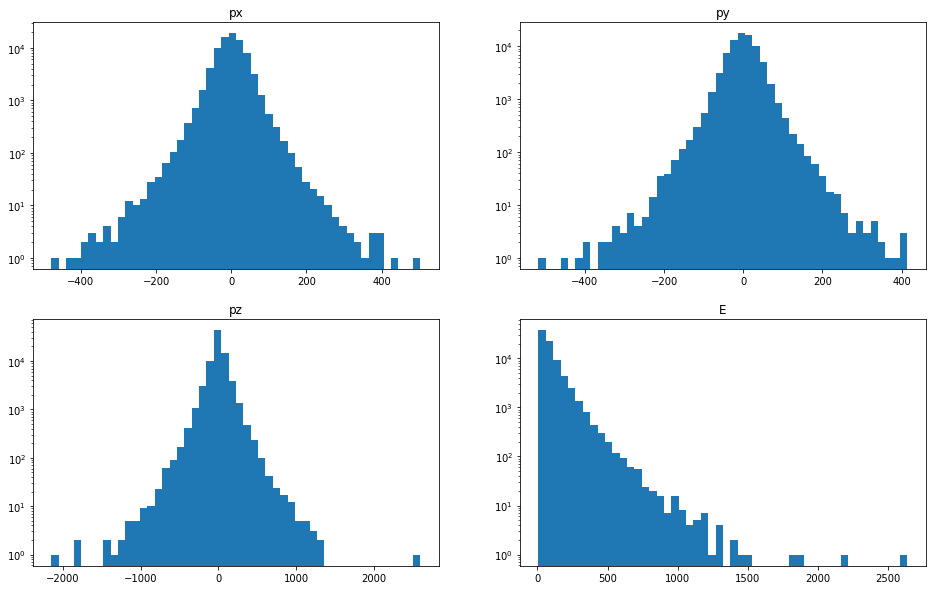

In [304]:
plot_histos(train_data.values, log = True)

In [130]:
scaler = MinMaxScaler().fit(train_data)
X_train = scaler.transform(train_data)
X_train.shape

(80000, 4)

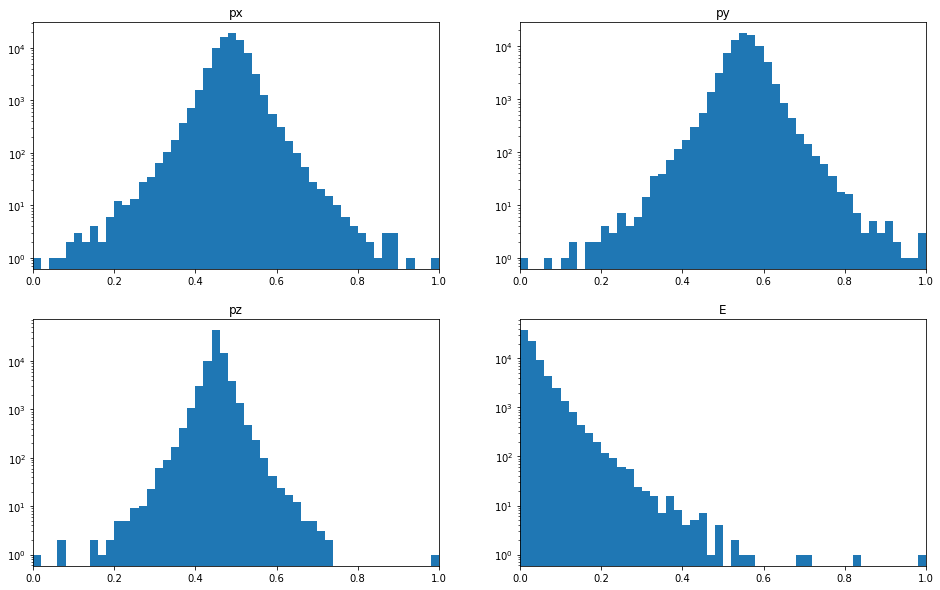

In [295]:
plot_histos(X_train)

In [296]:
def adam_optimizer():
    return keras.optimizers.adam_v2.Adam(learning_rate=0.0002, beta_1=0.5)

In [283]:
def create_generator():
    
    generator=Sequential()
    generator.add(Dense(activation='linear', units=64, input_dim=16))
    generator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    generator.add(Dense(activation='linear', units=128))
    generator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    generator.add(Dense(activation='linear', units=256))
    generator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    generator.add(Dense(activation='linear', units=4))
    
    generator.compile(loss='mean_squared_error', optimizer='adam')
    
    return generator

g = create_generator()
g.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_400 (Dense)           (None, 64)                1088      
                                                                 
 leaky_re_lu_129 (LeakyReLU)  (None, 64)               0         
                                                                 
 dense_401 (Dense)           (None, 128)               8320      
                                                                 
 leaky_re_lu_130 (LeakyReLU)  (None, 128)              0         
                                                                 
 dense_402 (Dense)           (None, 256)               33024     
                                                                 
 leaky_re_lu_131 (LeakyReLU)  (None, 256)              0         
                                                                 
 dense_403 (Dense)           (None, 4)              

In [284]:
def create_discriminator():
    
    discriminator=Sequential()
    discriminator.add(Dense(activation="linear", units=64, input_dim=4))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(activation="linear", units=32))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(activation="linear", units=16))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

d =create_discriminator()
d.summary()

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_404 (Dense)           (None, 64)                320       
                                                                 
 leaky_re_lu_132 (LeakyReLU)  (None, 64)               0         
                                                                 
 dropout_105 (Dropout)       (None, 64)                0         
                                                                 
 dense_405 (Dense)           (None, 32)                2080      
                                                                 
 leaky_re_lu_133 (LeakyReLU)  (None, 32)               0         
                                                                 
 dropout_106 (Dropout)       (None, 32)                0         
                                                                 
 dense_406 (Dense)           (None, 16)             

In [285]:
def create_gan(discriminator, generator):
    
    discriminator.trainable = False
    gan_input = Input(shape=(16,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')
    
    return gan

gan = create_gan(d,g)
gan.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 16)]              0         
                                                                 
 sequential_100 (Sequential)  (None, 4)                43460     
                                                                 
 sequential_101 (Sequential)  (None, 1)                2945      
                                                                 
Total params: 46,405
Trainable params: 43,460
Non-trainable params: 2,945
_________________________________________________________________


In [286]:
epochs = 20
batch_size = 128
    
# Creating GAN
generator= create_generator()
discriminator= create_discriminator()
gan = create_gan(discriminator, generator)
    
loss = dict(d=[], g=[])
    
with tqdm(total=batch_size) as bbar:
    
    for e in tqdm(range(1, epochs + 1)):
        
        bbar.reset()

        for _ in range(batch_size):

            # Generate random noise as an input to initialize the generator
            noise= np.random.normal(0, 1, [batch_size, 16])

            # Generate fake particles from noised input
            fake_batch = generator.predict(noise)

            # Get a random set of real particles
            real_batch = X_train[np.random.randint(low = 0,high = X_train.shape[0], size = batch_size)]

            # Construct different batches of real and fake data 
            X = np.concatenate([real_batch, fake_batch])

            # Labels for generated and real data
            Y = np.zeros(2 * batch_size)
            Y[:batch_size] = 0.90

            # Pre train discriminator on fake and real data before starting the gan. 
            discriminator.trainable = True
            
            l = discriminator.train_on_batch(X, Y)
            loss['d'].append(l)

            # Tricking the noised input of the Generator as real data
            X_ = np.random.normal(0, 1, [batch_size, 16])
            Y_ = np.ones(batch_size)

            # During the training of gan, the weights of discriminator should be fixed. 
            # We can enforce that by setting the trainable flag
            discriminator.trainable = False

            # Training the GAN by alternating the training of the Discriminator 
            # and training the chained GAN model with Discriminator’s weights freezed.
                
            l = gan.train_on_batch(X_, Y_)
            loss['g'].append(l)
            
            bbar.update(1)
            

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

2022-11-09 08:20:39.922916: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:39.965569: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:40.045709: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:40.104929: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:40.115619: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:42.279646: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:42.287620: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
2022-11-09 08:20:49.559276: W tensorflow/core/data/root_dataset.cc:16

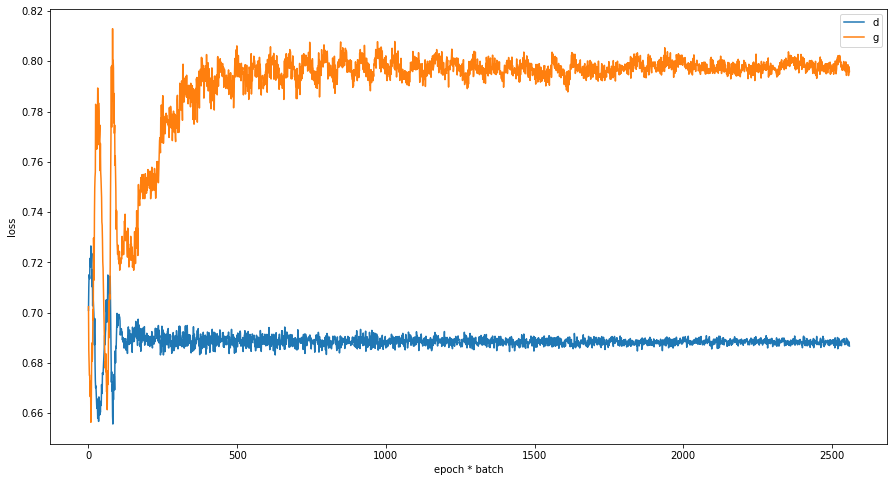

In [287]:
plt.figure(figsize=(15, 8))

plt.plot(loss['d'], label='d')
plt.plot(loss['g'], label='g')

plt.ylabel('loss')
plt.xlabel('epoch * batch')
plt.legend()
plt.show()

In [288]:
examples = 80000
    
noise = np.random.normal(loc = 0, scale = 1, size = [examples, 16])
X_gen = generator.predict(noise)

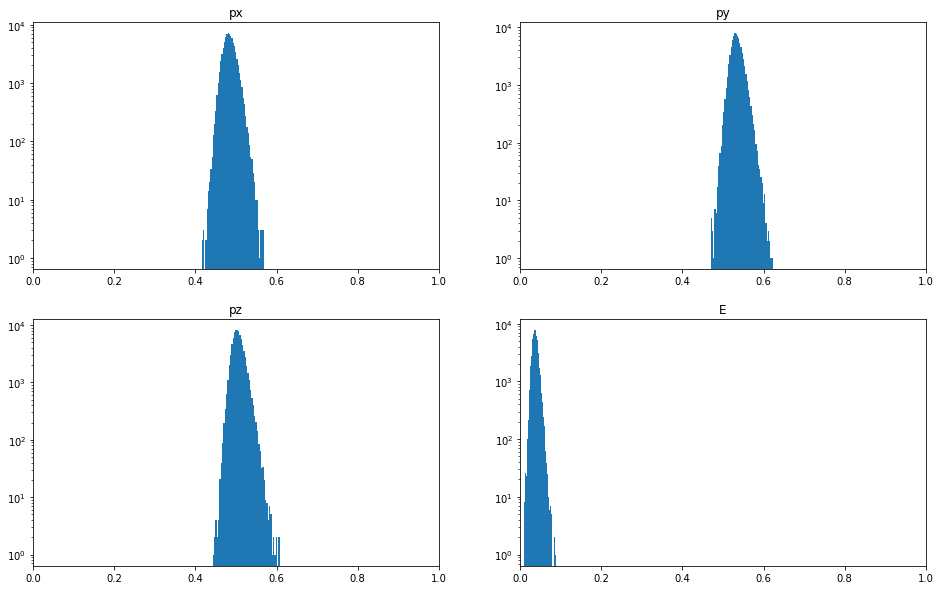

In [297]:
plot_histos(X_gen)